# Pi School Coding Test
![](https://businessschool.luiss.it/managing-artificial-intelligence-executive/wp-content/uploads/sites/268/2023/04/logo-pischool-retina-hr-1024x321.png)

Welcome, and congratulations on getting this far! 🚀

In this test you will have to demonstrate your analytical and problem-solving skills. 🤓


We will provide you with a dataset and you will have to solve a series of tasks ranging from data exploration to implementation machine learning models. Ready to get started?
Upon completion, you can share the Colab Notebook with us so that we can evaluate your performance. Break a leg!

## 1️⃣ Data Exploraton:


In this section, we want to see your ability to explore a dataset from scratch. You will be asked a series of questions whose answer is hidden within a dataset. After each question, you can write some code using Colab cells so that we can see how you arrived at the answer. Try to answer each question correctly, but in case you can't, we recommend that you go ahead and finish the test.


**Tip**: We really appreciate data visualization and storytelling, so surprise us and show us what interesting information you can extract from the dataset using visualizations 📊 📈  




You have a dataset of movies found on the Netflix Streaming Platform. The structure of the dataset is as follows :
- show_id : identifier of each data point
- type : problem type
- title : movie title
- director : director of the movie
- cast : the actors who starred in that movie
- country : where the movie was shot
- date_added : date on which this data point was recorded in the dataset
- release_year : date on which this film was released
- duration : film duration
- description : movie plot description
- genre : movie genre

## Load the dataset

***In the first section, we begin by setting up our environment.The dataset is then loaded into a DataFrame, resetting the index for easy handling.
We then analyse the data types and null counts for each column for preprocessing steps and perform further anlysis based on questions***

### Loading the dataset:


In [283]:
#start your code here!
# Imports
import networkx as nx
import pandas as pd
import os
import zipfile

In [284]:

# uncompressing the files
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/Pi_School_Assessment'
# with zipfile.ZipFile(os.path.join(base_path, 'pi_school_dataset.zip'), 'r') as zip_ref:
#     zip_ref.extractall(base_path)

enbed_path = os.path.join(base_path, 'sentence_embeddings.npy')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
# reading the dataframe with 0 based index
movies_df = pd.read_csv(os.path.join(base_path, 'pi_school_dataset', 'train.csv'), index_col = 0)
movies_df.reset_index(drop=True, inplace=True)
movies_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series


In [286]:
# checking the datatype: date column can be changed to datetime.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6223 entries, 0 to 6222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6223 non-null   object
 1   type          6223 non-null   object
 2   title         6223 non-null   object
 3   director      4330 non-null   object
 4   cast          5654 non-null   object
 5   country       5800 non-null   object
 6   date_added    6216 non-null   object
 7   release_year  6223 non-null   int64 
 8   duration      6223 non-null   int64 
 9   description   6223 non-null   object
 10  genre         6223 non-null   object
dtypes: int64(2), object(9)
memory usage: 534.9+ KB


In [287]:
# checking null rows for each column
movies_df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1893
cast,569
country,423
date_added,7
release_year,0
duration,0
description,0


In [288]:
movies_df.duplicated().sum()


0

 ***OBSERVATIONS:***

-  ***The index Column and the show_id column are similar (show_id = index_column +1), hence the index column is reset to start with 0.***


### 0.   Are the variables in the dataset related? If yes what does it mean?

**Answer** (in 2 sentences):
The (co)relation can be checked within dependent variables and between dependent and independent variables.

***within independent variables: This relation helps in understanding the distribution of the data.***
- From 3rd and 4th chart we can observe similar pattern of duration distribution of Movies and Genre movies where newly releases movies takes less years to get added on platform as this is dependent on the release and popularity of netflix.

***between dependent and independent variables: This relation helps in predicting the dependent variable.***
* The 1st and second chart helps in clearly dividing the classes based on the type and then further by duration. This suggests that we can create two different models for each of the type.

In [8]:
# import warnings
# warnings.filterwarnings("ignore")

In [9]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

Cramér's V between type and genre: 0.9884993537614677


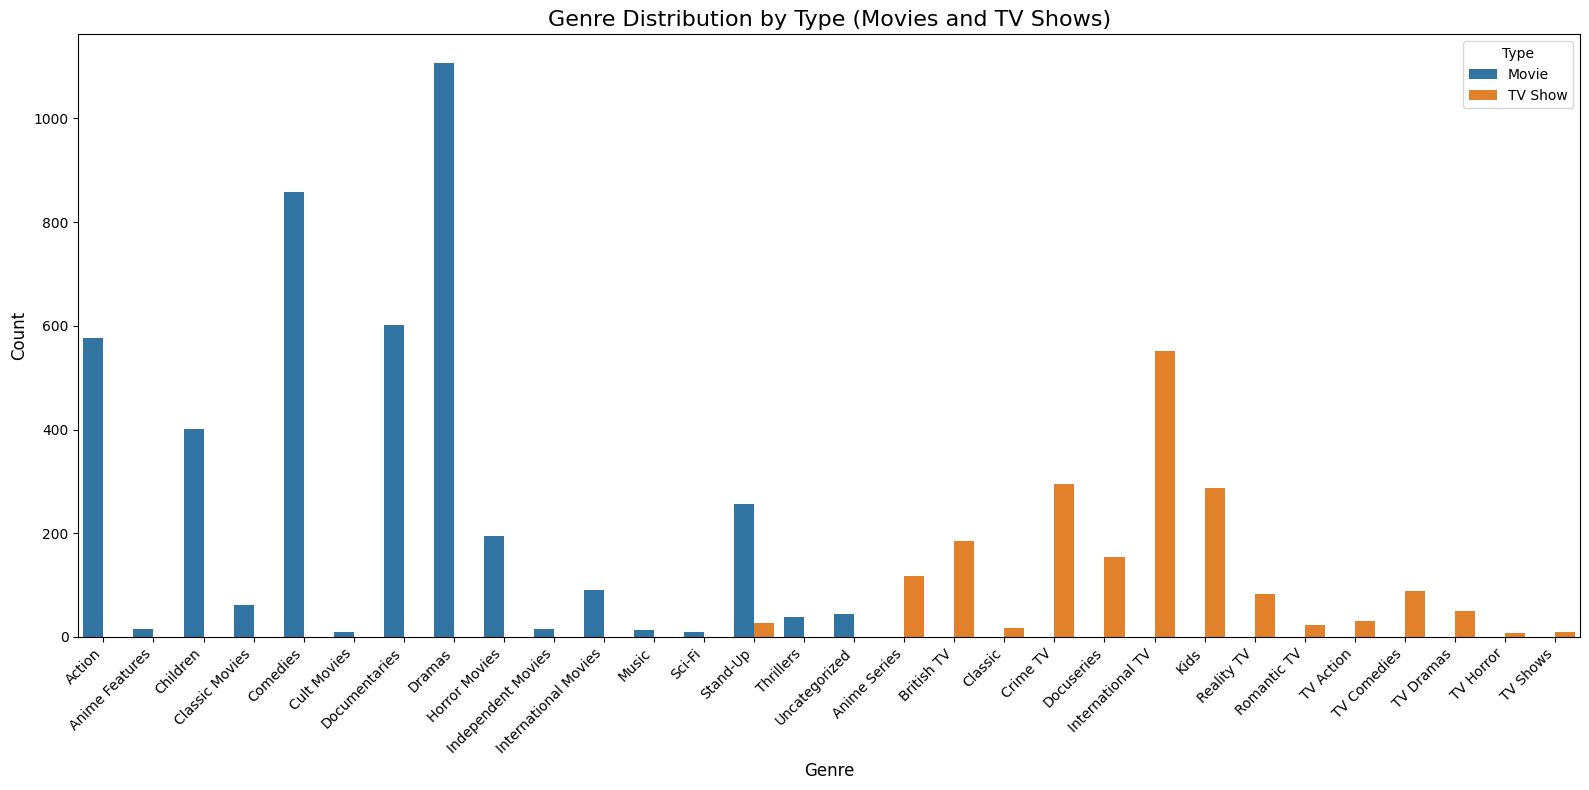

In [10]:
# Checking relation between type and genre
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


cramers_v_type_genre = cramers_v(movies_df['type'], movies_df['genre'])
print(f"Cramér's V between type and genre: {cramers_v_type_genre}")


# Count the occurrences of each genre for each type
genre_type_counts = movies_df.explode('genre').groupby(['type', 'genre']).size().reset_index(name='count')
plt.figure(figsize=(16, 8))
sns.barplot(data=genre_type_counts, x='genre', y='count', hue='type', dodge=True)

plt.title('Genre Distribution by Type (Movies and TV Shows)', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Type', loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-11-d21d70a9881b>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='genre', y='duration', data=movies_df[movies_df['type']=='Movie'], scale='width', ax=ax1)
<ipython-input-11-d21d70a9881b>:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='genre', y='duration', data=movies_df[movies_df['type']=='TV Show'], scale='width', ax=ax2)


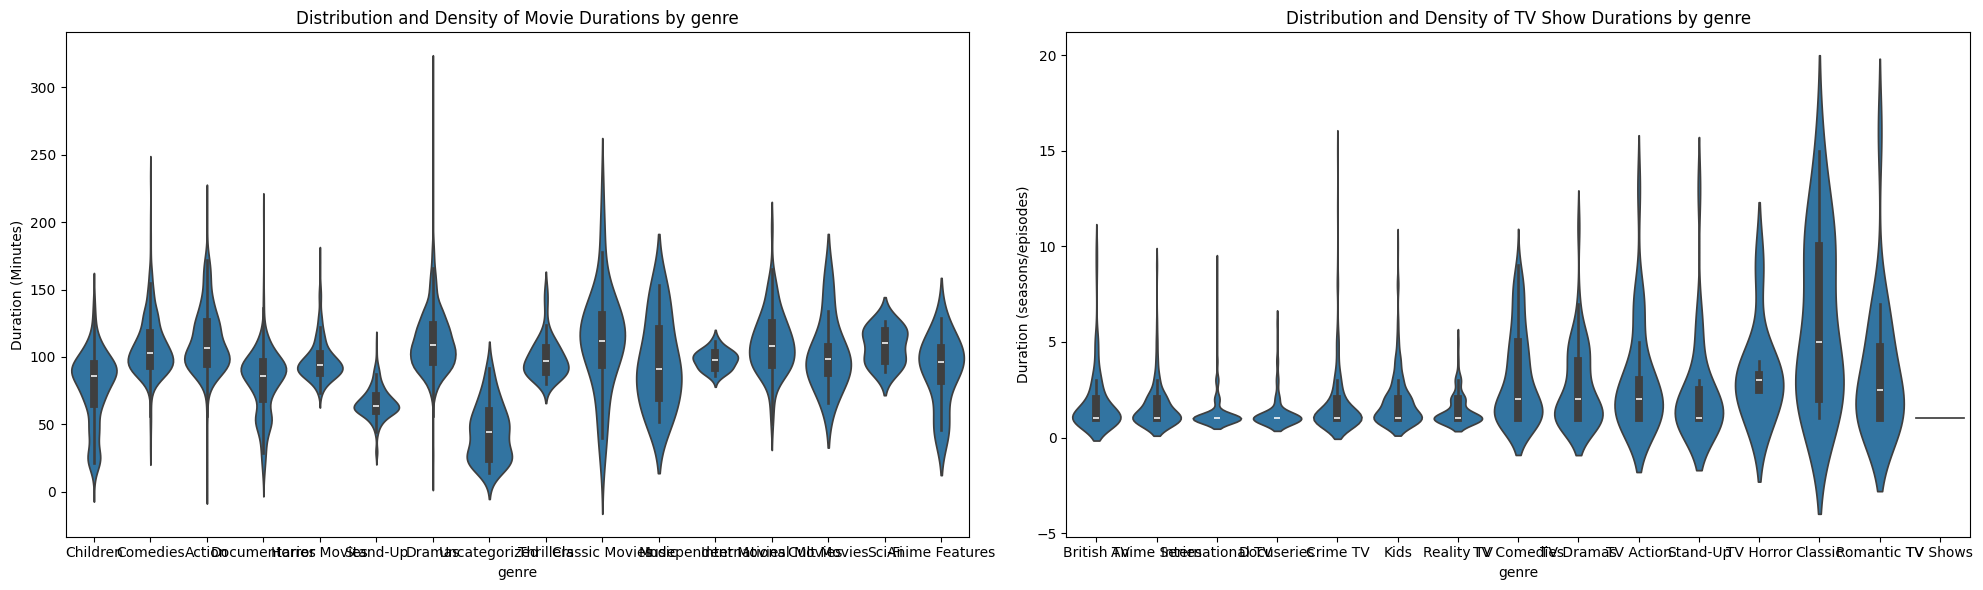

In [11]:
# Create a single figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot violin chart for movies on the first subplot (ax1)
sns.violinplot(x='genre', y='duration', data=movies_df[movies_df['type']=='Movie'], scale='width', ax=ax1)
ax1.set_title("Distribution and Density of Movie Durations by genre")
ax1.set_xlabel("genre")
ax1.set_ylabel("Duration (Minutes)")


# Plot violin chart for TV shows on the second subplot (ax2)
sns.violinplot(x='genre', y='duration', data=movies_df[movies_df['type']=='TV Show'], scale='width', ax=ax2)
ax2.set_title("Distribution and Density of TV Show Durations by genre")
ax2.set_xlabel("genre")
ax2.set_ylabel("Duration (seasons/episodes)")


# Adjust layout (optional)
plt.tight_layout()

plt.show()

In [12]:
# duration can be differentiator for standup for both the types
a = movies_df[(movies_df['type']=='TV Show' )]['genre'].unique()
b = movies_df[(movies_df['type']=='Movie' )]['genre'].unique()
print(set(a).intersection(set(b)))
print(movies_df[(movies_df['genre']=='Stand-Up') & (movies_df['type']=='Movie')]['duration'].describe())
print(movies_df[(movies_df['genre']=='Stand-Up') & (movies_df['type']=='TV Show')]['duration'].describe())


{'Stand-Up'}
count    256.000000
mean      65.859375
std       11.630072
min       28.000000
25%       59.750000
50%       64.000000
75%       71.000000
max      111.000000
Name: duration, dtype: float64
count    27.000000
mean      2.333333
std       2.616516
min       1.000000
25%       1.000000
50%       1.000000
75%       2.500000
max      13.000000
Name: duration, dtype: float64


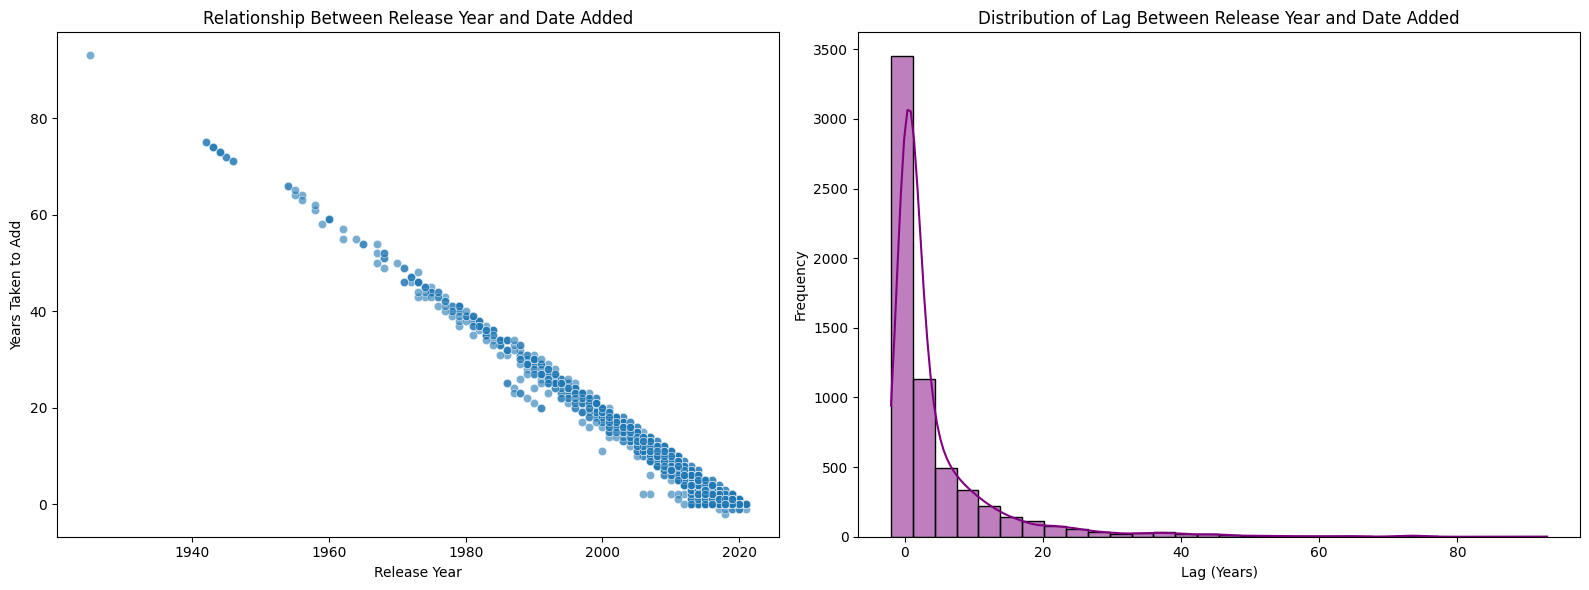

In [13]:

# Extract year from date_added and calculate lag
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'].apply(lambda x: str(x).strip()))
movies_df['date_added_year'] = movies_df['date_added'].dt.year
movies_df['release_diff'] = movies_df['date_added_year'] - movies_df['release_year']

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot 1: Scatter plot
sns.scatterplot(
    x='release_year',
    y='release_diff',
    data=movies_df,
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Relationship Between Release Year and Date Added")
axes[0].set_xlabel("Release Year")
axes[0].set_ylabel("Years Taken to Add")

# Plot 2: Histogram
sns.histplot(
    movies_df['release_diff'].dropna(),
    bins=30,
    kde=True,
    color='purple',
    ax=axes[1]
)
axes[1].set_title("Distribution of Lag Between Release Year and Date Added")
axes[1].set_xlabel("Lag (Years)")
axes[1].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



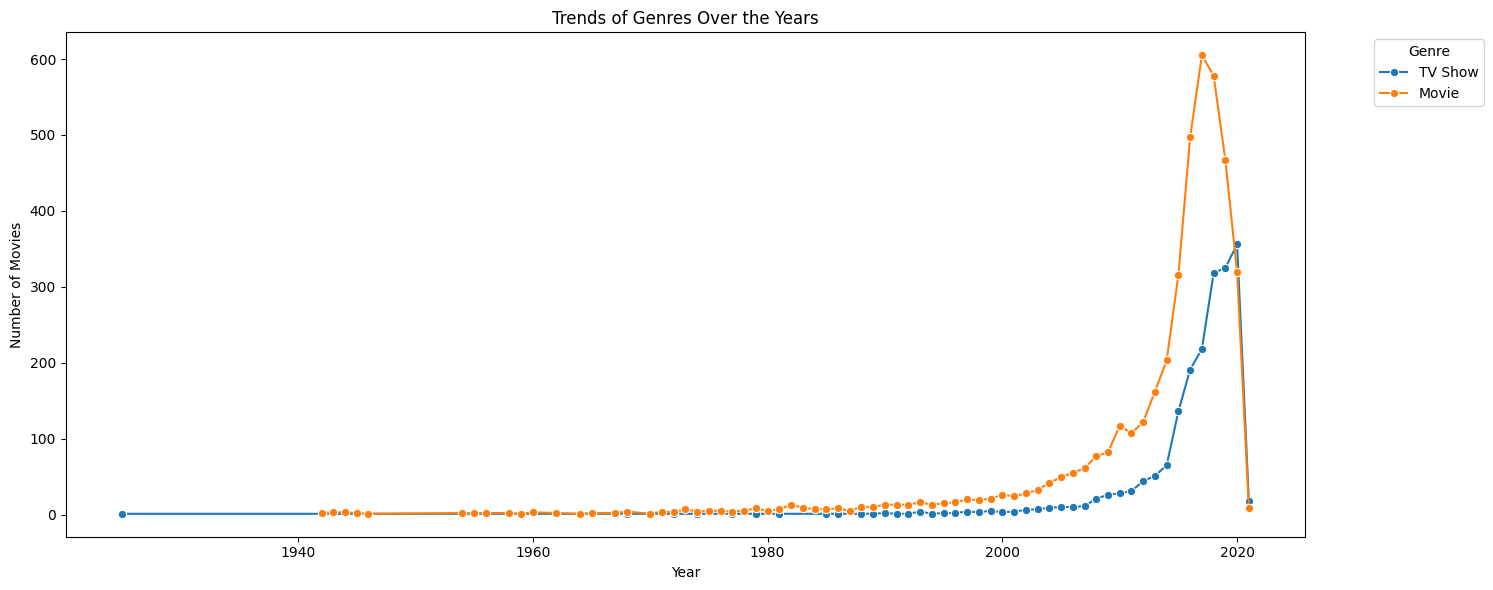

In [14]:
# Group by release_year and genre to get the count of movies per genre each year
genre_counts = movies_df.groupby(['release_year', 'type']).size().reset_index(name='Count')

# Plot the trends of genres over the years
plt.figure(figsize=(15, 6))
sns.lineplot(data=genre_counts, x='release_year', y='Count', hue='type', marker='o')
plt.title('Trends of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


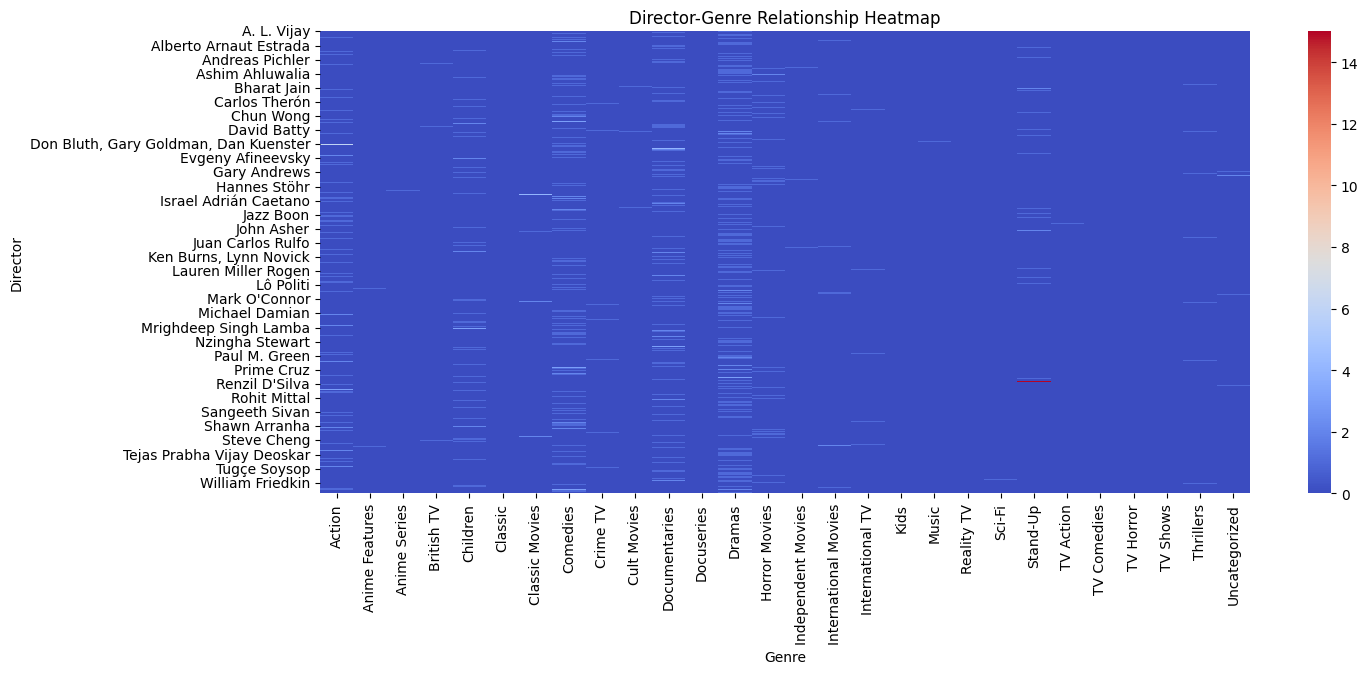

In [15]:
# can do the same for cast aswell

# Explode the director column to handle multiple directors for a single movie
movies_directors_df = movies_df.explode('director')

# Drop rows where director or genre is missing
movies_directors_df = movies_directors_df.dropna(subset=['director', 'genre'])

# Group by director and genre to count occurrences
director_genre_relation = movies_directors_df.groupby(['director', 'genre']).size().reset_index(name='count')

# Pivot the data to create a matrix-like format
relation_matrix = director_genre_relation.pivot(index='director', columns='genre', values='count').fillna(0)

plt.figure(figsize=(15, 6))
sns.heatmap(relation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Director-Genre Relationship Heatmap")
plt.ylabel("Director")
plt.xlabel("Genre")
plt.show()


 ***OBSERVATIONS:***

 * ***From the graphs we can conclude that if the type of movie description is
Movie then the class can be one of the following. Stand-Up can be added to this list if the duration of the movie is >16:***

['Children', 'Comedies', 'Action', 'Documentaries', 'Horror Movies',
        'Dramas', 'Uncategorized', 'Thrillers',
       'Classic Movies', 'Music', 'Independent Movies',
       'International Movies', 'Cult Movies', 'Sci-Fi', 'Anime Features']

* ***We also conclude that if the type of movie description is
TV Show then the class can be one of the following. Stand-Up can be added to this list if the duration of the movie is < 16:***

['British TV', 'Anime Series', 'International TV', 'Docuseries',
       'Crime TV', 'Kids', 'Reality TV', 'TV Comedies', 'TV Dramas',
       'TV Action', 'Stand-Up', 'TV Horror', 'Classic', 'Romantic TV',
       'TV Shows']


### 1.   Do the features in this dataset contain outliers?

Answer:

- The movies that are represented by only one country can be considered as outlier but cannot be removed, as test data can contain this scenario.

- The derived feature, release_diff (lag between movies release and add) contains some values outside IQR which are considered to be outlier.

- Based on movie duration, a lot of movies can be removed, however this is only due to the difference of units for movies and TV shows and hence wont be treated as outliers.


- Movies with uncategorised can be considered outliers, as they can clearly be classified with more description.
Therefore, they can either be removed or considered after adding more information.

In [16]:
#start your code here!
# import

from scipy.stats import zscore

Number of outliers based on Z-score: 156
Number of outliers based on iqr: 31


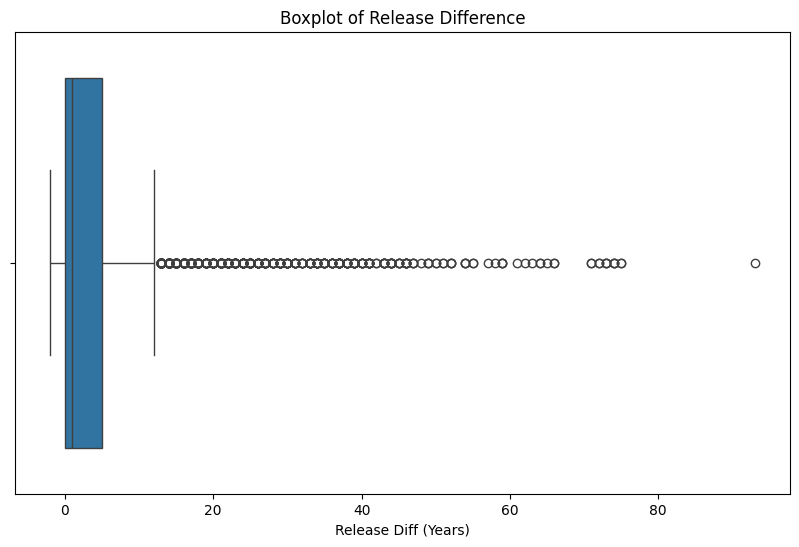

In [17]:
# Calculate the Z-scores
movies_df['z_score'] = zscore(movies_df['release_diff'].dropna())

# Identify outliers where |Z| > 3
outliers_zscore = movies_df[movies_df['z_score'].abs() > 3]

print(f"Number of outliers based on Z-score: {outliers_zscore.shape[0]}")

# based on iqr
# Assuming movies_df is your DataFrame and release_diff is the column of interest
Q1 = movies_df['release_diff'].quantile(0.25)
Q3 = movies_df['release_diff'].quantile(0.95)
IQR = Q3 - Q1

# Lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = movies_df[(movies_df['release_diff'] < lower_bound) | (movies_df['release_diff'] > upper_bound)]

print(f"Number of outliers based on iqr: {outliers.shape[0]}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=movies_df['release_diff'])
plt.title('Boxplot of Release Difference')
plt.xlabel('Release Diff (Years)')
plt.show()

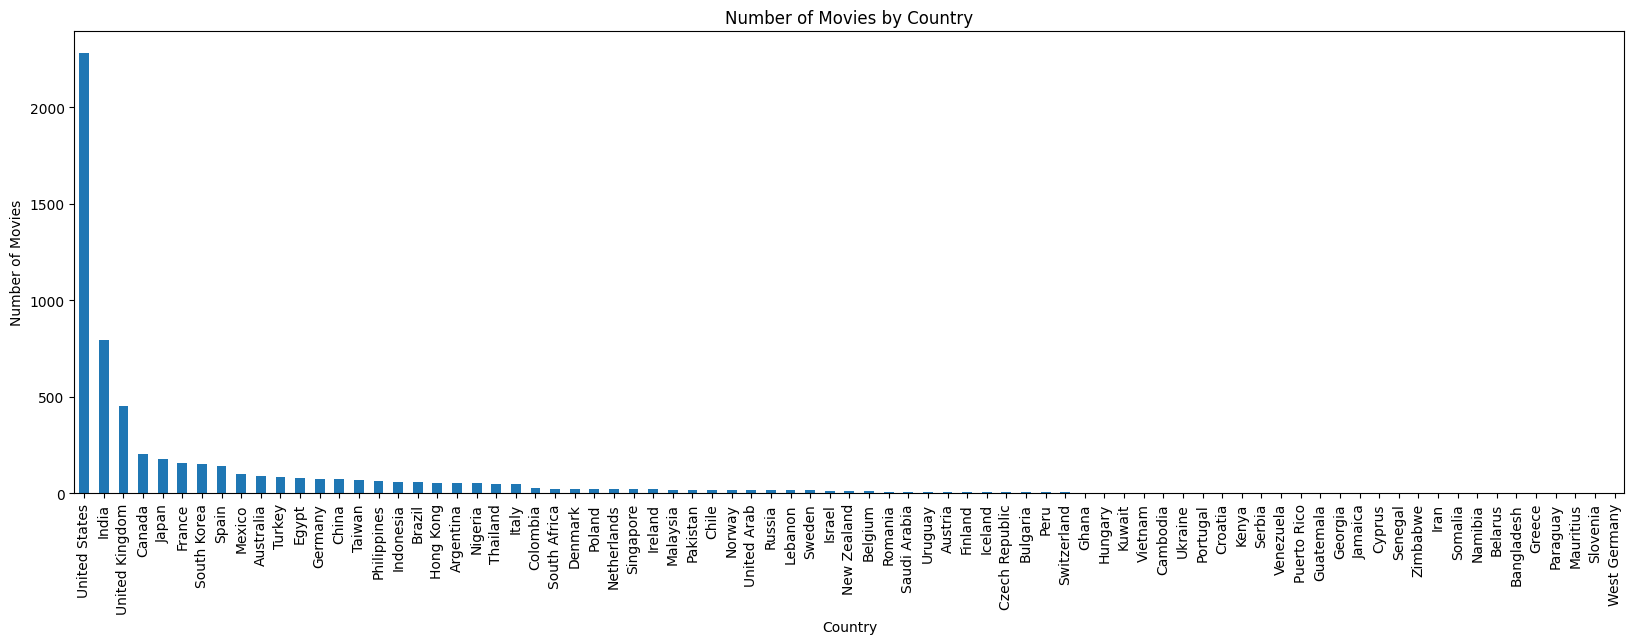

In [18]:

plt.figure(figsize=(20, 6))
movies_df['country'].value_counts().plot(kind='bar')
plt.title('Number of Movies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()


### 2.   Who is the actor who has worked in the cast with the most actors?

Answer: Anupam Kher

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Drop rows with null 'cast' values for processing
filtered_df = movies_df.dropna(subset=['cast'])

# Ensure 'cast' column is a list of actors
filtered_df['cast'] = filtered_df['cast'].str.split(',')

# Step 1: Create the graph
G = nx.Graph()

# Step 2: Add edges for co-actors
for cast in filtered_df['cast']:
    cast = [actor.strip() for actor in cast]  # Remove extra spaces around actor names
    for actor1, actor2 in combinations(cast, 2):
        if actor1 != actor2:  # Avoid self-loops
            if G.has_edge(actor1, actor2):
                G[actor1][actor2]['weight'] += 1
            else:
                G.add_edge(actor1, actor2, weight=1)


<ipython-input-19-fa2821ffda05>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cast'] = filtered_df['cast'].str.split(',')


In [20]:
most_connected_actor = max(G.degree, key=lambda x: x[1])
print(f"The actor who has worked with the most other actors is: {most_connected_actor[0]}")
most_connected_actor

The actor who has worked with the most other actors is: Anupam Kher


('Anupam Kher', 220)

### 3.   Which actor has worked in more films?

Answer: Anupam Kher

In [21]:
#start your code here!

# can use graph or explode here. Using graphs for exploration.


# Drop rows with null values in the 'cast' column
movies_with_cast = movies_df.dropna(subset=['cast'])

# Split the 'cast' column into individual actors and create a list of all actors
all_actors = movies_with_cast['cast'].str.split(', ').explode()

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Get the actor with the highest count
most_featured_actor = actor_counts.idxmax()
most_featured_actor_count = actor_counts.max()

print(f"The actor who has appeared in the most films is: {most_featured_actor} with {most_featured_actor_count} appearances.")


The actor who has appeared in the most films is: Anupam Kher with 33 appearances.


### 4.   How many films has each director made, and what is the genre of each film he has made?

In [22]:
#start your code here!
# Drop rows where 'director' or 'genre' are null
movies_with_directors = movies_df.dropna(subset=['director', 'genre'])

# Group by 'director' and aggregate to count films and list genres
director_stats = movies_with_directors.groupby('director').agg(
    total_films=('title', 'count'),  # Count the number of films
    genres=('genre', lambda x: ', '.join(x.unique()))  # List unique genres
).reset_index()

# Sort directors by the number of films they have made
director_stats = director_stats.sort_values(by='total_films', ascending=False)

director_stats.head(10)


,director,total_films,genres
2557,"Raúl Campos, Jan Suter",15,Stand-Up
1329,Jay Karas,12,"Stand-Up, Children"
1924,Marcus Raboy,12,Stand-Up
523,Cathy Garcia-Molina,12,"Comedies, Dramas, International Movies"
1981,Martin Scorsese,11,"Classic Movies, Documentaries, Dramas"
1327,Jay Chapman,9,Stand-Up
726,David Dhawan,8,"Comedies, Action"
3004,Steven Spielberg,8,"Action, Children, Classic Movies, Dramas"
3336,Youssef Chahine,8,"Dramas, Classic Movies"
2033,McG,7,"Action, Comedies"


### 5.  In which year have the most films been made in the U.S.? And in which year in Brazil?

Answer:
* Year with most films in the U.S.: 2017
* Year with most films in Brazil: 2020


In [24]:
#start your code here!

# Drop rows with null values in 'country' or 'release_year'
movies_by_country = movies_df.dropna(subset=['country', 'release_year'])

# Function to get the year with the most films for a specific country
def most_films_by_country(country):
    country_data = movies_by_country[movies_by_country['country'].str.contains(country, na=False)]
    films_per_year = country_data.groupby('release_year').size().reset_index(name='film_count')
    most_films_year = films_per_year.sort_values(by='film_count', ascending=False).iloc[0]
    return most_films_year

# U.S.
us_most_films = most_films_by_country('United States')

# Brazil
brazil_most_films = most_films_by_country('Brazil')

print(f"Year with most films in the U.S.: {us_most_films['release_year']} ({us_most_films['film_count']} films)")
print(f"Year with most films in Brazil: {brazil_most_films['release_year']} ({brazil_most_films['film_count']} films)")



Year with most films in the U.S.: 2017 (313 films)
Year with most films in Brazil: 2020 (19 films)


### 6.   Taking into consideration the duration of each film, which director shot the most minutes?

In [ ]:
# Filter for movies only, since the duration of TV Show is not in minutes.
movie_only = movies_df[movies_df['type'] == 'Movie']

# Drop rows with missing director or duration
valid_movies = movie_only.dropna(subset=['director', 'duration'])


# Group by director and calculate total duration
director_durations = valid_movies.groupby('director')['duration'].sum().reset_index()

# Find the director with the highest total duration
top_director = director_durations.sort_values(by='duration', ascending=False).iloc[0]

print(f"The director who shot the most minutes is {top_director['director']} with {top_director['duration']} minutes.")


### 7.   Taking into consideration the duration of each film, which director shot the most minutes?

Answer: answered at 6th question

In [ ]:
#start your code here!

### 8.   Which actor shot the most minutes in total?

Answer : Anupam Kher

In [ ]:
#start your code here!

# Filter for movies only, since the duration of TV Show is not in minutes.
movie_only = movies_df[movies_df['type'] == 'Movie']

# Drop rows with missing cast or duration
valid_movies = movie_only.dropna(subset=['cast', 'duration'])


# Expand the cast column into individual actor entries
actor_durations = valid_movies.assign(actor=valid_movies['cast'].str.split(', ')).explode('actor')

# Group by actor and calculate total duration
actor_total_durations = actor_durations.groupby('actor')['duration'].sum().reset_index()

# Find the actor with the highest total duration
top_actor = actor_total_durations.sort_values(by='duration', ascending=False).iloc[0]

print(f"The actor who shot the most minutes is {top_actor['actor']} with {top_actor['duration']} minutes.")


## 2️⃣ Unsupervised Learning

It often happens that when we see a movie we like, we look for a new movie that has a similar plot!
Are you able, based on the plots of these movies, to find clusters? How many clusters have you found? Could you also visualize in a 2D or 3D chart?

**Tip**: I think there is a need to create embedding of descriptions... 🤔

![](https://carpenter-singh-lab.broadinstitute.org/files/styles/original/public/anne/files/browser-based_p1_compressed.gif?itok=su5EM3Vp)

***We will perform this task in the following steps.***

* ***Embedding Generation with evaluation***
* ***Clutering embeddings with evaluation***
* ***Visualising emdeddings with clusters***




In [ ]:
#start your code here!
#imports
# from sentence_transformers import SentenceTransformer, util  # using sentencetransformer we wont need tokenisation
import numpy as np
import pandas as pd
from collections import Counter
import plotly.express as px
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances
from scipy.spatial.distance import cosine
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


#### Embeddings

***Embeddings for the description can be created with Text vectorization, word or sentence embedding methods.
We will select a pretrained light weight transformer based sentence embedding model for its ability to create context-aware sentence embeddings, which are crucial for distinguishing genres with overlapping vocabulary.***

***more model details: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2***


In [ ]:
movies_df['title_description'] = movies_df['title'] + '.' + movies_df['description']

In [ ]:
#Generate embeddings for the movie descriptions



#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Load model from HuggingFace Hub or use sentence transformer to avoid these steps
embedding_tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
embedding_model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')

# Tokenize sentences
encoded_input = embedding_tokenizer(movies_df['title_description'].fillna('nan').tolist(), padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = embedding_model(**encoded_input)

# Perform pooling
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# Normalize embeddings
sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

print("Sentence embeddings:")
print(sentence_embeddings)
similarity_matrix = cosine_similarity(sentence_embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Sentence embeddings:
tensor([[ 0.0180,  0.0174, -0.0097,  ...,  0.1006, -0.0030,  0.0234],
        [ 0.0897, -0.0659,  0.0270,  ..., -0.0146, -0.0620,  0.0414],
        [-0.0206,  0.0712, -0.1149,  ..., -0.0490,  0.0170,  0.0284],
        ...,
        [ 0.0072, -0.0296,  0.0051,  ...,  0.0588,  0.0171,  0.0089],
        [-0.1070, -0.0265,  0.0119,  ...,  0.0345, -0.0048, -0.0538],
        [ 0.0207, -0.0319, -0.0180,  ..., -0.0228, -0.0624, -0.0215]])


In [ ]:
np.save(enbed_path, sentence_embeddings)
print("Embeddings and model saved successfully.")


In [ ]:
# sentence_embeddings = np.load('sentence_embeddings.npy')

In [ ]:
def get_relevant_title_description(movie_id, movies_df, similarity_matrix, top_k=5):
    """
    Retrieves relevant movie titles and descriptions based on movie_id using a precomputed similarity matrix.

    Args:
        movie_id: The ID of the movie to find similar movies for.
        movies_df: The DataFrame containing movie data.
        similarity_matrix: Precomputed similarity matrix between all movies.
        top_k: The number of most similar movies to return.

    Returns:
        A list of dictionaries, each containing the title and description of a similar movie.
    """
    try:
        # Get the index for the input movie_id
        movie_index = movies_df.index[movies_df['show_id'] == movie_id].tolist()[0]
    except IndexError:
        print(f"Movie with ID {movie_id} not found in the dataset.")
        return []

    # Retrieve similarity scores for the given movie from the precomputed matrix
    similarities = similarity_matrix[movie_index]

    # Get the indices of the top_k most similar movies (excluding the input movie itself)
    top_indices = similarities.argsort()[::-1][1:top_k + 1]

    # Retrieve titles and descriptions for similar movies
    relevant_movies = []
    for index in top_indices:
        relevant_movies.append({
            'title': movies_df.iloc[index]['title'],
            'description': movies_df.iloc[index]['description'],
            'genre': movies_df.iloc[index]['genre']

        })

    return relevant_movies
# Get relevant movies for a given movie_id
relevant_movies = get_relevant_title_description('s4658', movies_df, similarity_matrix, top_k=5)

# Display results
for movie in relevant_movies:
    print(f"Title: {movie['title']}\nDescription: {movie['description']}\nGenre: {movie['genre']}\n")


Title: Marvel's Luke Cage
Description: A hoodie-wearing, unbreakable ex-con fights to clear his name and save his neighborhood. He wasn't looking for a fight, but the people need a hero.
Genre: Crime TV

Title: A Choo
Description: Determined to win the heart of his childhood crush from orphanage, EJ becomes a boxer with superpowers and soon confronts a formidable villain.
Genre: Action

Title: Bhavesh Joshi Superhero
Description: When his best friend is killed for uncovering political corruption, an idealistic young man decides to become a masked fighter for justice.
Genre: Dramas

Title: The Man Who Feels No Pain
Description: Leveraging his ability to withstand pain, a young man trains to follow in the footsteps of his martial-arts hero in this high-action, meta comedy.
Genre: Action

Title: Hero
Description: A pugilist from Shantung struggles to rise to the top of the Shanghai triad ladder, where his stellar martial arts talents can shine.
Genre: Action



#### Clustering

***Clustering of embeddings can be done with clustering and topic modelling algorithms, but since our scope is to cluster only descriptions based on genres we will focus on these clustering algorithms.***

- kmeans
- DBScan

***We will use the embeddings as features for these algorithms and silhoutte score for seleting the model. After clustering, we see the purity score for each cluster to evaluate the clustering based on genres. The score (0-1) corresponds to the homogeneity of genres within the cluster. Finally we will visualise the embeddings in 3d with dimensionality reduction***





In [ ]:
def calculate_genre_distribution(df, genre_column='genre', cluster_column='kmeans_cluster'):
    """
    Calculates the genre distribution for each cluster.

    Args:
        df (DataFrame): Data containing cluster and genre information.
        genre_column (str): Name of the column containing genres.
        cluster_column (str): Name of the column containing cluster labels.

    Returns:
        dict: Genre distribution normalized for each cluster.
    """
    genre_distribution = {}

    for cluster_id in df[cluster_column].unique():
        cluster_data = df[df[cluster_column] == cluster_id]
        genre_counts = Counter([genre for genres in cluster_data[genre_column] for genre in genres.split(',')])
        total_count = sum(genre_counts.values())
        genre_distribution[cluster_id] = {genre: count / total_count for genre, count in genre_counts.items()}

    return genre_distribution

# Function to calculate entropy for a genre distribution
def calculate_entropy(genre_proportions):
    """
    Calculates the entropy for a given genre distribution.
    """
    return -sum([p * np.log(p) if p > 0 else 0 for p in genre_proportions.values()])

# Function to calculate cluster purity based on entropy and dominant genre
def calculate_cluster_purity(genre_distribution):
    """
    Calculates a purity score for each cluster using entropy and dominant genre proportions.
    """
    purity_scores = {}
    for cluster_id, genre_proportions in genre_distribution.items():
        entropy = calculate_entropy(genre_proportions)
        max_genre_percentage = max(genre_proportions.values())
        purity_score = 1 / (entropy + (1 - max_genre_percentage))  # Combine entropy and dominance
        purity_scores[cluster_id] = purity_score

    return purity_scores

In [ ]:
# ------ K-Means Clustering ------
# Dimensionality reduction not required for clustering as the features can fit in memory and provide more information (30 genres) to the model.

# Determine the optimal number of clusters using the Silhouette Score
scores = []
range_n_clusters = range(6, 30, 2)  # Testing different cluster numbers

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(sentence_embeddings)  # Use embeddings, not distance matrix
    score = silhouette_score(sentence_embeddings, labels, metric='cosine')
    scores.append(score)

# Plot silhouette scores to visualize the optimal cluster count
plt.plot(range_n_clusters, scores, marker='o')
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
# Perform K-Means with the chosen number of clusters
optimal_clusters = 20  # Replace with the best number from the plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(sentence_embeddings)
movies_df['kmeans_cluster'] = kmeans_labels  # Add labels to the DataFrame

# Evaluate K-Means clustering
silhouette_kmeans = silhouette_score(sentence_embeddings, kmeans_labels, metric='cosine')
davies_bouldin_kmeans = davies_bouldin_score(sentence_embeddings, kmeans_labels)

print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin_kmeans}")

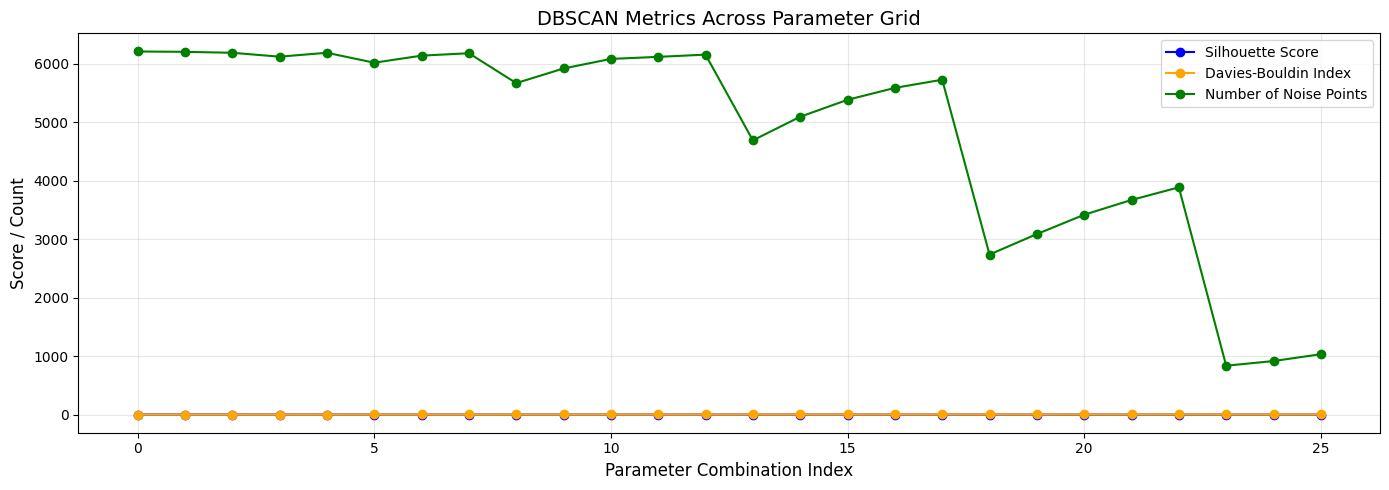

In [ ]:
# ------ DB Scan ------


dbscan_results = []

# Range of eps and min_samples values
eps_range =  np.arange(0.05, 2, 0.05) # -> use knn to understand the range of valid eps.
min_samples_range = range(3, 8) # Range for min_samples

# Loop over eps and min_samples combinations : grid search
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(metric='cosine', eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(sentence_embeddings)

        # Filter out noise (-1 labels)
        valid_labels = dbscan_labels[dbscan_labels != -1]
        valid_embeddings = sentence_embeddings[dbscan_labels != -1]

        # If valid clusters exist, evaluate clustering
        if len(set(valid_labels)) > 2:
            silhouette_dbscan = silhouette_score(valid_embeddings, valid_labels, metric='cosine')
            davies_bouldin_dbscan = davies_bouldin_score(valid_embeddings, valid_labels)

            # Count noise points
            noise_points = len(dbscan_labels[dbscan_labels == -1])

            # Store results
            dbscan_results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette': silhouette_dbscan,
                'davies_bouldin': davies_bouldin_dbscan,
                'noise_points': noise_points
            })

# Convert results to a DataFrame
results_df = pd.DataFrame(dbscan_results)

# Visualization
plt.figure(figsize=(14, 5))

# Plot Silhouette Score
plt.plot(results_df.index, results_df['silhouette'], marker='o', label='Silhouette Score', color='blue')

# Plot Davies-Bouldin Index
plt.plot(results_df.index, results_df['davies_bouldin'], marker='o', label='Davies-Bouldin Index', color='orange')

# Plot Number of Noise Points
plt.plot(results_df.index, results_df['noise_points'], marker='o', label='Number of Noise Points', color='green')

# Chart settings
plt.title("DBSCAN Metrics Across Parameter Grid", fontsize=14)
plt.xlabel("Parameter Combination Index", fontsize=12)
plt.ylabel("Score / Count", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# ------ Cluster Evaluation Metrics ------

# Calculate genre distribution and purity scores
genre_distribution = calculate_genre_distribution(movies_df, genre_column='genre', cluster_column='kmeans_cluster')
purity_scores = calculate_cluster_purity(genre_distribution)

# Display purity scores
print("Cluster Purity Scores:")
for cluster, score in purity_scores.items():
    print(f"Cluster {cluster}: Purity Score = {score:.4f}")

Cluster Purity Scores:
Cluster 11: Purity Score = 0.3838
Cluster 0: Purity Score = 0.3358
Cluster 8: Purity Score = 0.3248
Cluster 1: Purity Score = 0.3921
Cluster 13: Purity Score = 0.3316
Cluster 9: Purity Score = 0.3662
Cluster 3: Purity Score = 0.3023
Cluster 12: Purity Score = 0.3124
Cluster 4: Purity Score = 0.3317
Cluster 5: Purity Score = 0.3936
Cluster 10: Purity Score = 0.4221
Cluster 14: Purity Score = 0.3715
Cluster 7: Purity Score = 0.3379
Cluster 15: Purity Score = 0.3400
Cluster 6: Purity Score = 0.3176
Cluster 2: Purity Score = 0.3066


#### Visualisation of cluster

Since cluster features are in high dimentions, we will compress them to 3 dimensions fro visualisation

In [ ]:
# Step 3: Reduce dimensions to 3 using PCA
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# Step 4: Prepare DataFrame for plotting
# Ensure alignment between the clusters and embeddings
reduced_df = pd.DataFrame(reduced_embeddings, columns=['PC1', 'PC2', 'PC3'])
reduced_df['cluster'] = movies_df['kmeans_cluster'].astype(str).values  # Add cluster labels to the DataFrame
reduced_df['title'] = movies_df['title'].values  # Ensure title alignment
reduced_df['description'] = movies_df['description'].fillna('No Description').values  # Handle missing values
reduced_df['genre'] = movies_df['genre'].fillna('No genre').values  # Handle missing values

# Step 5: Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    data_frame = reduced_df,
    x='PC1',  # X-axis: First principal component
    y='PC2',  # Y-axis: Second principal component
    z='PC3',  # Z-axis: Third principal component
    color='cluster',  # Color points by cluster
    hover_name='title',  # Movie title on hover
    hover_data={'PC1': False, 'PC2': False, 'PC3': False, 'title':True, 'cluster': True, 'description': False,'genre':True},  # Hover info
    title="3D Clustering of Movie Plots"
)

# Step 6: Update marker properties for better visualization
fig.update_traces(marker=dict(size=5, opacity=0.8, line=dict(width=1, color='black')))

# Show the interactive plot
fig.show()


## ***OBSERVATIONS:***

- ***Sampling movies with similar characteristics based on their embeddings produced promising results.***
- ***We opted for the K-Means algorithm over DBSCAN because DBSCAN identified more than 15% of the records as outliers while K-Means, being a centroid-based method, worked better for our data, producing more meaningful clusters with fewer outliers.***

-  ***K-Means yielded relatively good purity scores (0.3-0.4) for the clusters, indicating that the clustering was reasonably accurate in grouping movies by genre. However, there is room for improvement through to lower this score with further tuning of the algorithm and preprocessing of the data (such as cleaning text or adding more description).***


## 3️⃣ Supervised Learning - Classification
In this exercise, you will use the variable "Genre" as the classification target to create atleast 2 classification models (1st : Classical ML Model, 2nd : Deep Learning Model) using the rest of the variables as features. Given that we have a mix of text and numerical data, you can use a machine learning/deep learning model also to embed the features of the text along with the other variables. Please considering doing the following :
1. Plot and comment on the data distribution
2. Justify your choice of method/model for embedding and for classification
3. Identify the appropriate metrics for the task
4. Plot the metrics and comment on the performance of the model


![](https://thumbs.gfycat.com/SecondaryDapperCopperbutterfly-size_restricted.gif)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import os
# from dotenv import load_dotenv
# load_dotenv()
from langchain_core.output_parsers import PydanticOutputParser
# from langchain_openai import AzureChatOpenAI
from pydantic import BaseModel, Field
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from langchain_core.prompts import PromptTemplate
# from langchain_openai import AzureChatOpenAI
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau

###Optional

If you prefer you can solve this task usign a LLM as a classifier! Otherwise go with standard solutions.

### LLM based classification

***Classification using llms is often easy and accurate. It all depends on the prompt engineering technique used. In this section we will demonstrate classification on a few samples by leveraging few shot learning on title and description. We will use gpt4o for text generation and pydantic parser for obtaining structured output.***

In [ ]:
# !pip install langchain-openai

In [ ]:
# output parser
class Genre(BaseModel):
    genre: str = Field(description="The genre of the movie")

parser = PydanticOutputParser(pydantic_object=Genre)

In [ ]:
DEPLOYMENT_NAME = "gpt-4o"
MODEL_NAME = "gpt-4o"

prompt2 = """

You are a Netflix enthusiast and an expert in movie classification because of your knowledge of movies. Your task is to classify a movie into one of the following genres based on the description and title:

Children: Content designed for a young audience, often light-hearted, educational, or entertaining.
Comedies: Movies or shows designed to evoke laughter through humor, satire, or amusing characters.
Action: High-paced content featuring physical feats, battles, or thrilling adventures.
Documentaries: Informative, factual productions focusing on real-world topics, events, or individuals.
Horror Movies: Content designed to evoke fear or suspense, often involving supernatural or psychological elements.
Dramas: Serious storytelling focusing on emotional or interpersonal conflicts.
Thrillers: Edge-of-your-seat content that creates suspense, tension, or excitement, often involving danger or mystery.
Classic Movies: Timeless, iconic films that have left a lasting impact on cinema history.
Music: Movies or shows centered around music, performances, or the lives of musicians.
Independent Movies: Films produced outside major studio systems, often emphasizing unique storytelling or artistic expression.
International Movies: Movies originating outside the mainstream English-speaking industry, showcasing diverse cultures.
Cult Movies: Films that have developed a dedicated fanbase, often due to their unique, unconventional, or niche appeal.
Sci-Fi: Content exploring speculative or futuristic concepts like advanced technology, space exploration, or alternate realities.
Anime Features: Japanese-style animated movies featuring a wide range of genres and often rich storytelling.

You need to analyze the title and description of the movie and determine which genre it best fits. If the description doesn't strongly match any genre, classify the movie as Uncategorized.
Return only the genre that best represents the movie based on its description.

Example:

title: The Dark Knight
desc: The movie follows Batman as he faces the anarchist Joker, who seeks to plunge Gotham into chaos. The film is known for its gripping action, complex characters, and philosophical themes on justice and morality. Heath Ledger's iconic portrayal of the Joker
 remains a standout performance
Genre: Action

Description of the movie: {desc}

Title of the movie: {title}

Genre:

format_instructions:

{format_instructions}

"""

In [ ]:
llm = AzureChatOpenAI(

    deployment_name=DEPLOYMENT_NAME, model_name=MODEL_NAME, temperature=0,
    api_key = os.environ.get('API_KEY',None),
    api_version=os.environ.get('API_VERSION',None),
    azure_endpoint=os.environ.get('API_ENDPOINT',None),
    openai_api_type='azure',
)

In [ ]:
prompt = PromptTemplate(
    template=prompt2,
    input_variables=["desc", "title"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

prompt_and_model = prompt | llm
output = prompt_and_model.invoke(
    {"desc": movies_df.iloc[5]['description'],"title": movies_df.iloc[5]['title']})

res = parser.invoke(output)
print(f"Prediction: {res.genre} Ground Truth:{movies_df.iloc[5]['genre']} ")

Prediction: Comedies Ground Truth:Comedies 


### Traditional ML Models

***Training traditional machine learning models often requires a meticulous preprocessing and hyperparameter tuning. In this section, we will train common models like Logistic Regression, Support Vector Classifier (SVC), k-Nearest Neighbors (k-NN), and XGBoost to address the classification task.***

***We will leverage GridSearchCV to systematically tune hyperparameters for optimal performance. Sentence embeddings from the clustering section will be employed as features, with dimensionality reduction techniques applied to mitigate the curse of dimensionality.***

***To incorporate the imbalanced nature of the dataset, we will integrate class weights into the models and prioritize f1-score as a more reliable metric than accuracy.***

In [290]:
# To normalize duration
scaler = MinMaxScaler()

# we will use only catgorised classes
# we will use these features:'normalized_duration','title_description',
#there are >3k directors, and as observed in eda, there is a relation between director and genre however, there are some directors that are nill.  We can impute them based on cast and country and
# write a mapping code for directors to possible set of genres if we know the test set has similar distribution.

# Encode the target variable: genre
movies_df['title_description'] = movies_df['title'] + '. ' + movies_df['description']
movies_df['normalized_duration'] = scaler.fit_transform(movies_df[['duration']])
# movies_df['director'] = movies_df['director'].fillna('')
# movies_df['director_list'] = movies_df['director'].apply(lambda x: list(str(x).strip().split(',')))

# Filter out rows where 'genre' is 'uncategorized' (outliers)
movies_movies_df = movies_df[movies_df['genre'] != 'Uncategorized']
# We will tune the model on Movies dataset and perform direct prediction on TV Shows
movies_movies_df = movies_movies_df[movies_movies_df['type'] == 'Movie']

movie_genre_mapping = {genre: idx for idx, genre in enumerate(movies_movies_df['genre'].unique())}
# Apply the custom mapping to the 'genre' column
movies_movies_df['genre_encoded'] = movies_movies_df['genre'].map(movie_genre_mapping)

movies_movies_df = movies_movies_df[['normalized_duration','title_description','genre','genre_encoded']]

# loading the se from the clustering section
sentence_embeddings = np.load(enbed_path)
embedding_indices = movies_movies_df.index.tolist()
movie_embeddings = sentence_embeddings[embedding_indices]

In [291]:
pca = PCA(n_components=20) # no of pca conponents can be selected with explained_variance_ratio_
reduced_embeddings = pca.fit_transform(movie_embeddings)
features = np.hstack([
    np.vstack(reduced_embeddings),  # Stack embeddings of title_ desc into a matrix
    movies_movies_df[['normalized_duration']].values,    # Include normalized duration
])
print(features.shape)

(4252, 21)


In [295]:
X = features  # Features: sentence embeddings + duration
y = movies_movies_df['genre_encoded']  # Target: encoded genres

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [216]:
# These params were obtained via simple grid search
models = {
    'logistic regression': LogisticRegression(max_iter=500, random_state=42, class_weight='balanced',penalty='l1',solver='liblinear',),
    'svc': SVC(kernel='linear', probability=True, random_state=42, class_weight='balanced'),
    'knn': KNeighborsClassifier(n_neighbors=12,weights='distance',p=1, metric='cosine'),
    "Xg boost":  XGBClassifier(objective='multi:softmax',eval_metric='merror',class_weght='balanced',
                               scale_pos_weight=10, random_state=42, max_depth=5, gamma=1e-3, min_child_weight=2),

}

# Fit and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    print(f"Training f1 score: {f1_score(y_train, model.predict(X_train), average='weighted'):.2f}")
    y_pred = model.predict(X_test)  # Predict on the test set

    # Evaluate the model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} F1 score: {f1_score(y_test, y_pred, average='weighted'):.2f}")



Training logistic regression...
Training f1 score: 0.51

logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.57      0.58        80
           1       0.56      0.38      0.45       172
           2       0.61      0.54      0.57       116
           3       0.71      0.76      0.73       120
           4       0.52      0.62      0.56        39
           5       0.75      0.90      0.82        51
           6       0.57      0.28      0.38       222
           7       0.12      0.50      0.20         8
           8       0.04      0.08      0.05        12
           9       0.15      0.67      0.25         3
          10       0.00      0.00      0.00         3
          11       0.06      0.06      0.06        18
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.06      0.33      0.10         3

    accuracy                     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/c

Training f1 score: 1.00

Xg boost Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        80
           1       0.53      0.55      0.54       172
           2       0.59      0.59      0.59       116
           3       0.67      0.77      0.72       120
           4       0.52      0.36      0.42        39
           5       0.81      0.86      0.84        51
           6       0.51      0.60      0.55       222
           7       0.50      0.12      0.20         8
           8       0.00      0.00      0.00        12
           9       1.00      0.33      0.50         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3

    accuracy                           0.58       851
   macro avg       0.39

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [296]:
y_pred = models['knn'].predict(X_test)  # Predict on the test set

inverse_genre_mapping = {v: k for k, v in movie_genre_mapping.items()}  # Reverse the mapping
movie_class_names= list(movie_genre_mapping.keys())
y_test = [inverse_genre_mapping[label] for label in y_test]
y_pred = [inverse_genre_mapping[label] for label in y_pred]
np.save('knn_movies_model.npy', y_pred) # saving results for next section

cm1 = confusion_matrix(y_test, y_pred, labels= movie_class_names)

In [298]:
# preparing tv show dataset
# Filter out rows where 'genre' is 'uncategorized' (outliers)
tvshows_movies_df = movies_df[movies_df['genre'] != 'Uncategorized']
tvshows_movies_df = tvshows_movies_df[tvshows_movies_df['type'] == 'TV Show']
tvshows_genre_mapping = {genre: idx for idx, genre in enumerate(tvshows_movies_df['genre'].unique())}
# Apply the custom mapping to the 'genre' column
tvshows_movies_df['genre_encoded'] = tvshows_movies_df['genre'].map(tvshows_genre_mapping)
tvshows_movies_df = tvshows_movies_df[['normalized_duration','title_description','genre','genre_encoded']]


# loading the se from the clustering section
sentence_embeddings = np.load(enbed_path)
embedding_indices = tvshows_movies_df.index.tolist()
tvshow_embeddings = sentence_embeddings[embedding_indices]

pca = PCA(n_components=20) # no of pca conponents can be selected with explained_variance_ratio_
reduced_embeddings = pca.fit_transform(tvshow_embeddings)
features = np.hstack([
    np.vstack(reduced_embeddings),  # Stack embeddings of title_ desc into a matrix
    tvshows_movies_df[['normalized_duration']].values,    # Include normalized duration
])
print(features.shape)
X = features  # Features: sentence embeddings + duration
y = tvshows_movies_df['genre_encoded']  # Target: encoded genres

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(1926, 21)


In [299]:
# we can observe that none of model could predict accurate response for classes less thna 20 records that highly suggests to incluede samples for these label.
# we can use SMOTE technique to create synthetic embeddings for these imbalanced classes but for now, we will use KNN as it performed a little better than xg boost.

tv_show_knn = KNeighborsClassifier()
tv_show_knn.set_params(**models['knn'].get_params())
tv_show_knn.fit(X_train, y_train)
print(f"Training f1 score: {f1_score(y_train, tv_show_knn.predict(X_train), average='weighted'):.2f}")
y_pred = tv_show_knn.predict(X_test)  # Predict on the test set
model_name = 'knn'
# Evaluate the model
print(f"\n{model_name} Classification Report:")
print(classification_report(y_test, y_pred))
print(f"{model_name} F1 score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

Training f1 score: 1.00

knn Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.24      0.32        37
           1       0.48      0.42      0.44        24
           2       0.58      0.75      0.65       111
           3       0.50      0.39      0.44        31
           4       0.63      0.81      0.71        59
           5       0.70      0.84      0.77        58
           6       0.50      0.38      0.43        16
           7       0.60      0.17      0.26        18
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00         6
          10       0.38      0.60      0.46         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.58       386
   macro avg       0.32     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [300]:
inverse_genre_mapping = {v: k for k, v in tvshows_genre_mapping.items()}  # Reverse the mapping
tvshow_class_names= list(tvshows_genre_mapping.keys())
y_test = [inverse_genre_mapping[label] for label in y_test]
y_pred = [inverse_genre_mapping[label] for label in y_pred]
np.save('knn_tvshows_model.npy', y_pred) # saving results for next section
cm2 = confusion_matrix(y_test, y_pred, labels=tvshow_class_names)

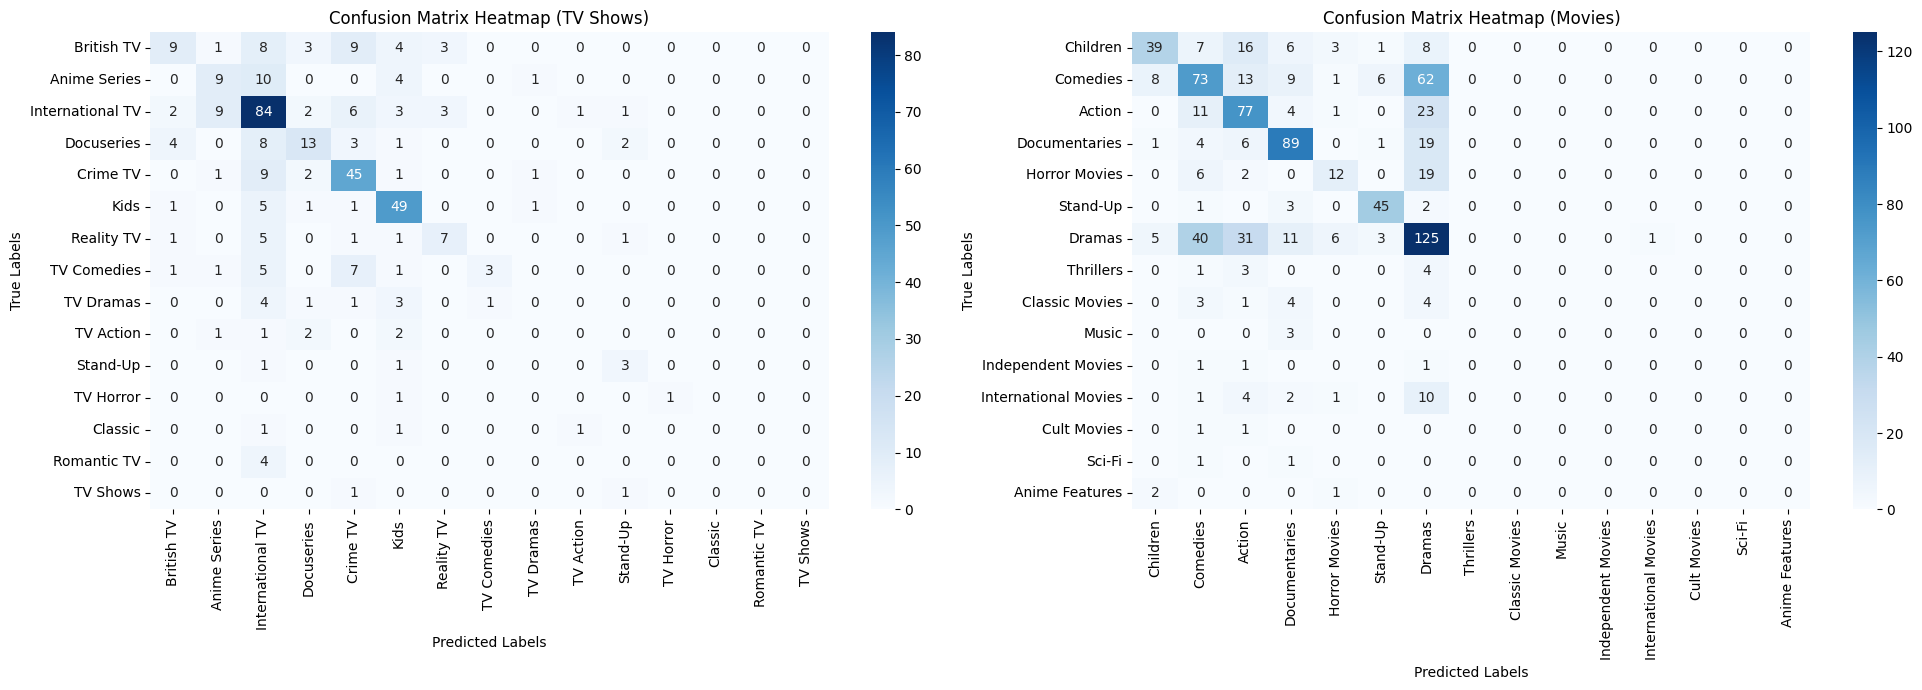

In [221]:
# Create a heatmap to visualize the confusion matrix
# Create a single figure with two subplots side by side
plt.figure(figsize=(20, 7))

# Plot the first heatmap for TV Shows
plt.subplot(1, 2, 1)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=tvshow_class_names, yticklabels=tvshow_class_names)
plt.title('Confusion Matrix Heatmap (TV Shows)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot the second heatmap for Movies
plt.subplot(1, 2, 2)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=movie_class_names, yticklabels=movie_class_names)
plt.title('Confusion Matrix Heatmap (Movies)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

* higher misclassification rates for International TV Dramas due to their larger representation in the dataset.

## Deep Learning model
***Deep learning models, while computationally intensive, offer significant advantages for incorporating embeddings into model. In this section, we will design  custom models one sequential and another based on encoder architecture of attention to check its ability to capture long-range dependencies in textual data.***

***To incorporate  class imbalance, we will use focal loss, classification report and class weights within the model.***


***Additionally, we will incorporate transfer learning techniques, utilizing a pre-trained model trained on movies to fine-tune it for TV shows. This approach aims to retain knowledge from the base task and adapt it to a new domain.
***

***Finally, we will evaluate model effectiveness using advanced metrics like f1-score and visualize learning curves to monitor training and validation progress.***


In [248]:
#--------movies data----------

movies_movies_df = movies_df[movies_df['genre'] != 'Uncategorized']
movies_movies_df = movies_movies_df[movies_movies_df['type'] == 'Movie']
movies_genre_mapping = {genre: idx for idx, genre in enumerate(movies_movies_df['genre'].unique())}
movies_movies_df['genre_encoded'] = movies_movies_df['genre'].map(movies_genre_mapping)
sentence_embeddings = np.load(enbed_path)
embedding_indices = movies_movies_df.index.tolist()
movie_embeddings = sentence_embeddings[embedding_indices]

movies_features_full = np.hstack([
    np.vstack(movie_embeddings),  # Stack embeddings of title_ desc into a matrix
    movies_movies_df[['normalized_duration']].values,
        # Include normalized duration
])
X_movies = movies_features_full  # Features: sentence embeddings + duration
y_movies = movies_movies_df['genre_encoded']  # Target: encoded genres


#--------tv shows data----------
tvshows_movies_df = movies_df[movies_df['genre'] != 'Uncategorized']
tvshows_movies_df = tvshows_movies_df[tvshows_movies_df['type'] == 'TV Show']
movie_genre_mapping = {genre: idx for idx, genre in enumerate(tvshows_movies_df['genre'].unique())}
tvshows_movies_df['genre_encoded'] = tvshows_movies_df['genre'].map(movie_genre_mapping)
embedding_indices = tvshows_movies_df.index.tolist()
tvshows_embeddings = sentence_embeddings[embedding_indices]

tvshows_features_full = np.hstack([
    np.vstack(tvshows_embeddings),  # Stack embeddings of title_ desc into a matrix
    tvshows_movies_df[['normalized_duration']].values,
        # Include normalized duration
])
X_tvshows = tvshows_features_full  # Features: sentence embeddings + duration
y_tvshows = tvshows_movies_df['genre_encoded']  # Target: encoded genres

In [245]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_movies, y_movies, test_size=0.2, random_state=42, stratify=y)

In [246]:
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the labels
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1))  # Reshape for sklearn
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))

In [247]:
# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=8,
    min_lr=1e-9,
    verbose=1
)

n_classes = movies_movies_df['genre_encoded'].nunique()

# Build Feedforward Neural Network
X_train_reshaped = np.expand_dims(X_train, axis=2)  # Adding a timestep dimension
X_test_reshaped = np.expand_dims(X_test, axis=2)

# Build the model
custom_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(n_classes, activation='softmax')  # Adjust the output layer based on the number of classes
])

custom_model.compile(optimizer=Adam(learning_rate=1e-5),  loss='categorical_focal_crossentropy', metrics=['accuracy','precision'])
custom_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.2303 - loss: 0.5830 - precision: 0.0000e+00 - val_accuracy: 0.2878 - val_loss: 0.5599 - val_precision: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.2544 - loss: 0.5404 - precision: 0.0000e+00 - val_accuracy: 0.2878 - val_loss: 0.4988 - val_precision: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.2566 - loss: 0.4743 - precision: 0.0000e+00 - val_accuracy: 0.2878 - val_loss: 0.4383 - val_precision: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.2385 - loss: 0.4293 - precision: 0.0000e+00 - val_accuracy: 0.2878 - val_loss: 0.4108 - val_precision: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.2440 - loss: 0.4048 - precision: 0.0000e+00 - val_accuracy: 0.2878 - val_loss: 0.3991 - val_precision: 0.0000e+00 - 

In [249]:
# # Predict on test data
y_pred_nn = custom_model.predict(X_test_reshaped)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Report classification performance
print("Classification Report :")
print(classification_report(y_test_classes, y_pred_nn_classes))

inverse_genre_mapping = {v: k for k, v in movies_genre_mapping.items()}  # Reverse the mapping
movies_class_names= list(movies_genre_mapping.keys())
y_test = [inverse_genre_mapping[label] for label in y_test_classes]
y_pred = [inverse_genre_mapping[label] for label in y_pred_nn_classes]
cm1 = confusion_matrix(y_test, y_pred, labels=movies_class_names)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.42      0.23      0.29       172
           2       0.00      0.00      0.00       116
           3       0.89      0.07      0.12       120
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        51
           6       0.28      0.95      0.44       222
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3

    accuracy                           0.30       851
   macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### transformer based architecture

In [250]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [301]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(movies_movies_df['title_description'], movies_movies_df['genre_encoded'], test_size=0.2, random_state=42, stratify=movies_movies_df['genre_encoded'])
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1))  # Reshape for sklearn
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))

# Check the shape
print(y_train.shape)  # Should be (num_samples, num_classes)
print(y_test.shape)

(3401, 15)
(851, 15)


In [302]:
max_len = 20
oov_token = '00_V'
padding_type = 'post'
trunc_type = 'post'
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

Vocab Size:  14387


In [303]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [304]:
embed_dim = 50
heads = 2
neurons = 32
vocab_size = 20886

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(y_train.shape[1], activation="softmax")(x)
tf_model = Model(inputs=inputs, outputs=outputs)

In [305]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(2e-5), loss='categorical_focal_crossentropy', metrics=['accuracy','precision'])
tf_model.summary()
tf_model_name = "tf_model.keras"
checkpoint = ModelCheckpoint(tf_model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 10, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=1e-5)


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_14      │ (None, 20, 50)              │       1,045,300 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_14               │ (None, 20, 50)              │          23,832 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_11          │ (None, 50)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 15)                  │             765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,897 (4.08 MB)

 Trainable params: 1,069,897 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

In [306]:
history1 = tf_model.fit(X_train,y_train,
                    validation_data=(X_test,y_test),
                    epochs=50,
                    batch_size=32,
                       callbacks=[checkpoint,learning_rate_reduction]
                    )

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1149 - loss: 0.5553 - precision: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.47317, saving model to tf_model.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.1153 - loss: 0.5551 - precision: 0.0000e+00 - val_accuracy: 0.2632 - val_loss: 0.4732 - val_precision: 0.0000e+00 - learning_rate: 2.0000e-05
Epoch 2/50
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2330 - loss: 0.4862 - precision: 0.0000e+00
Epoch 2: val_loss improved from 0.47317 to 0.43538, saving model to tf_model.keras
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.2332 - loss: 0.4860 - precision: 0.0000e+00 - val_accuracy: 0.2620 - val_loss: 0.4354 - val_precision: 0.0000e+00 - learning_rate: 2.0000e-05
Epoch 3/50
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2669 - loss: 0.4517 - precision: 0.0000e+00
Epoch 3: val_loss improved from 0.43538 to 0.41594, saving model to tf_model.keras
107/107 ━━━━━━━━━━━━━━━━━━

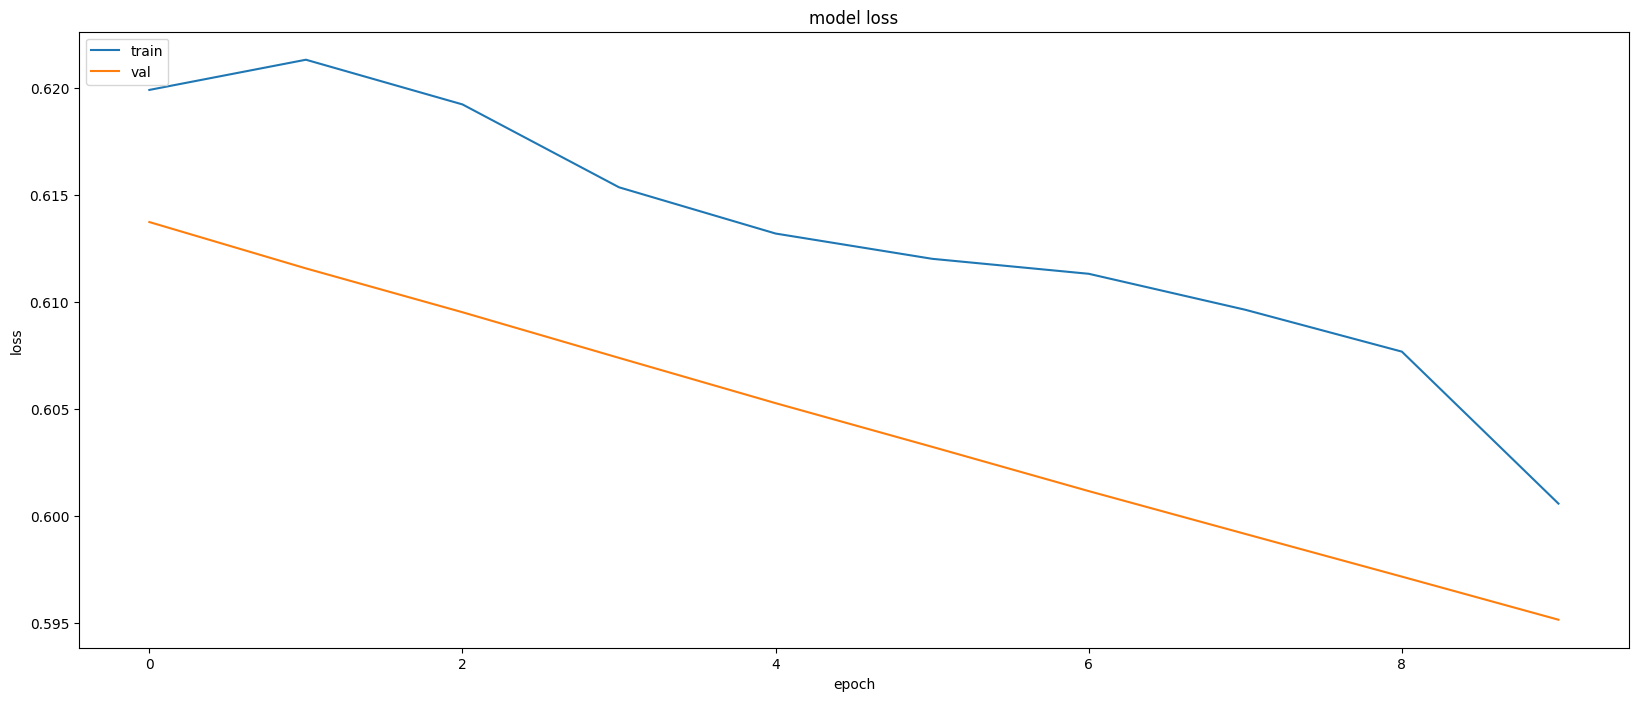

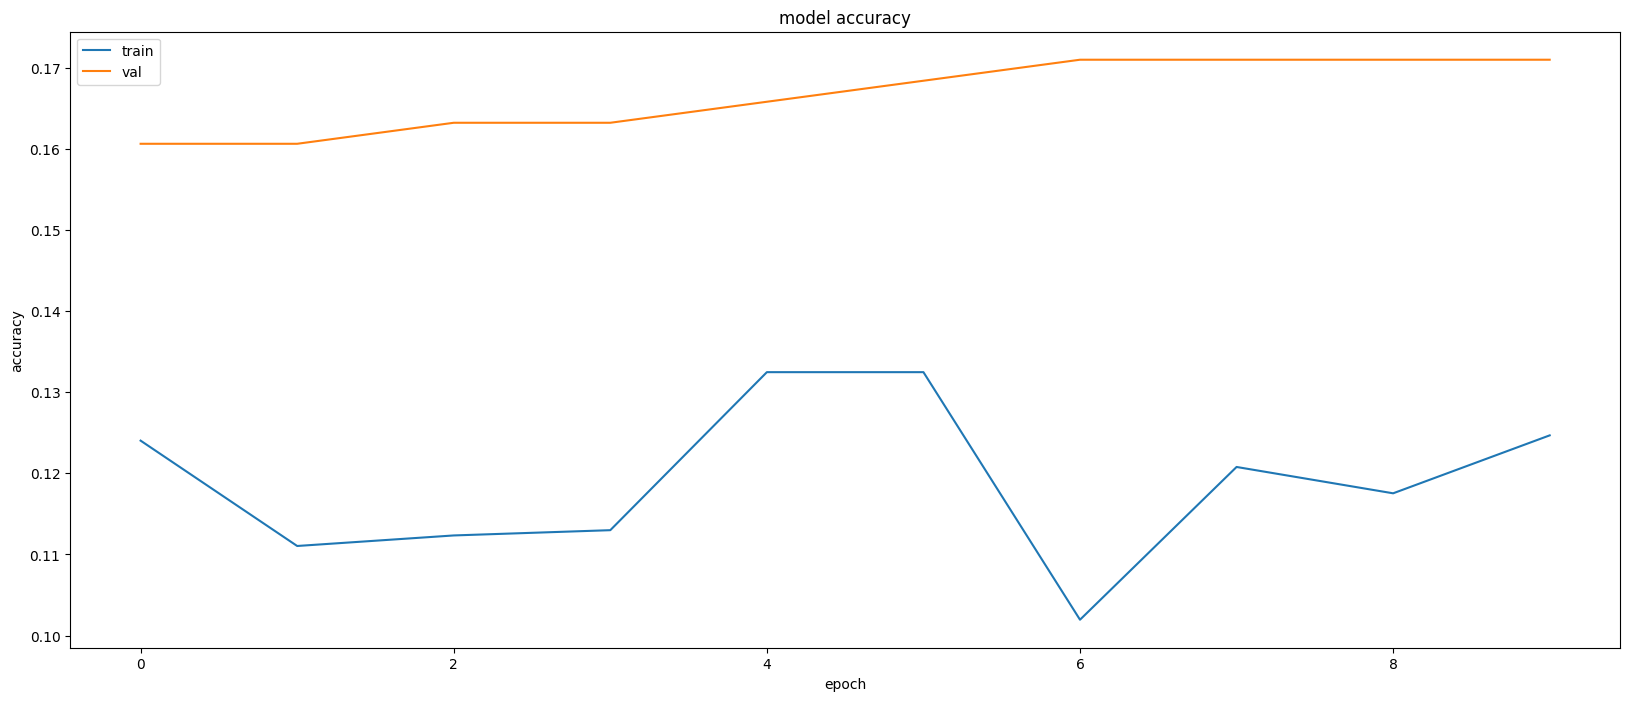

In [307]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [308]:
from sklearn.metrics import classification_report, accuracy_score

# Get predictions
predictions = tf_model.predict(X_test)  # Replace X_test with your test data
predicted_classes = predictions.argmax(axis=1)  # Get the predicted class indices
# Convert one-hot encoded ground truth to class indices
true_classes = y_test.argmax(axis=1)

inverse_genre_mapping = {v: k for k, v in movies_genre_mapping.items()}  # Reverse the mapping
movie_class_names= list(movies_genre_mapping.keys())
y_test = [inverse_genre_mapping[label] for label in true_classes]
y_pred = [inverse_genre_mapping[label] for label in predicted_classes]
np.save('tf_movies_model.npy', y_pred) # saving the results for next section

cm1 = confusion_matrix(y_test, y_pred, labels= movie_class_names)
# Print accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=movies_movies_df['genre'].unique()  # Replace with right classes
)
print("Classification Report:")
print(report)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.48
Classification Report:
                      precision    recall  f1-score   support

            Children       0.54      0.26      0.35        80
            Comedies       0.43      0.44      0.43       172
              Action       0.44      0.52      0.47       116
       Documentaries       0.66      0.68      0.67       120
       Horror Movies       0.29      0.05      0.09        39
            Stand-Up       0.92      0.69      0.79        51
              Dramas       0.42      0.62      0.50       222
           Thrillers       0.00      0.00      0.00         8
      Classic Movies       0.00      0.00      0.00        12
               Music       0.00      0.00      0.00         3
  Independent Movies       0.00      0.00      0.00         3
International Movies       0.00      0.00      0.00        18
         Cult Movies       0.00      0.00      0.00         2
              Sci-Fi       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [309]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tvshows_movies_df['title_description'], tvshows_movies_df['genre_encoded'], test_size=0.2, random_state=42, stratify=tvshows_movies_df['genre_encoded'])
# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1))  # Reshape for sklearn
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))

# Check the shape
print(y_train.shape)  # Should be (num_samples, num_classes)
print(y_test.shape)
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

(1540, 15)
(386, 15)


In [310]:
# Freeze the embedding and transformer layers from the movie model
for layer in tf_model.layers:
    layer.trainable = False  # Freeze all layers

# Modify the output layer for the TV show dataset
# Retain input and earlier layers
new_inputs = tf_model.input
x = tf_model.layers[-3].output  # Access the output from the GlobalAveragePooling1D layer
x = Dropout(0.35)(x)  # Retain the dropout layer
new_outputs = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Create the new model
transfer_model = Model(inputs=new_inputs, outputs=new_outputs)

# Compile the new model
transfer_model.compile(optimizer=tf.keras.optimizers.Adam(2e-5),
                       loss='categorical_focal_crossentropy', metrics=['accuracy','precision'])

# Summary of the transfer learning model
transfer_model.summary()



Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ token_and_position_embedding_14      │ (None, 20, 50)              │       1,045,300 │
│ (TokenAndPositionEmbedding)          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_encoder_14               │ (None, 20, 50)              │          23,832 │
│ (TransformerEncoder)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_11          │ (None, 50)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_62 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 15)                  │             765 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,069,897 (4.08 MB)

 Trainable params: 765 (2.99 KB)

 Non-trainable params: 1,069,132 (4.08 MB)

In [311]:
# Train the model on the new dataset
history2 = transfer_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[ModelCheckpoint("transfer_model.keras", save_best_only=True, monitor="val_loss"),
               EarlyStopping(monitor="val_loss", patience=3)]
)


Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.0486 - loss: 0.6746 - precision: 0.0000e+00 - val_accuracy: 0.0311 - val_loss: 0.6693 - val_precision: 0.0000e+00
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0411 - loss: 0.6869 - precision: 0.0000e+00 - val_accuracy: 0.0337 - val_loss: 0.6660 - val_precision: 0.0000e+00
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0573 - loss: 0.6816 - precision: 0.0000e+00 - val_accuracy: 0.0415 - val_loss: 0.6628 - val_precision: 0.0000e+00
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0491 - loss: 0.6617 - precision: 0.0000e+00 - val_accuracy: 0.0440 - val_loss: 0.6597 - val_precision: 0.0000e+00
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0437 - loss: 0.6616 - precision: 0.0000e+00 - val_accuracy: 0.0440 - val_loss: 0.6565 - val_precision: 0.0000e+00
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0419 - loss: 0.6756 - precision: 0.0000e

In [312]:
from sklearn.metrics import classification_report, accuracy_score

# Get predictions
predictions = transfer_model.predict(X_test)  # Replace X_test with your test data
predicted_classes = predictions.argmax(axis=1)  # Get the predicted class indices
# Convert one-hot encoded ground truth to class indices
true_classes = y_test.argmax(axis=1)

inverse_genre_mapping = {v: k for k, v in tvshows_genre_mapping.items()}  # Reverse the mapping
tvshows_class_names= list(tvshows_genre_mapping.keys())
y_test = [inverse_genre_mapping[label] for label in true_classes]
y_pred = [inverse_genre_mapping[label] for label in predicted_classes]
np.save('tf_tvshows_model.npy', y_pred) # saving results for next section
cm2 = confusion_matrix(y_test, y_pred, labels= tvshows_class_names)
# Print accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=tvshows_movies_df['genre'].unique()  # Replace with right classes
)
print("Classification Report:")
print(report)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy: 0.10
Classification Report:
                  precision    recall  f1-score   support

      British TV       0.00      0.00      0.00        37
    Anime Series       0.00      0.00      0.00        24
International TV       0.00      0.00      0.00       111
      Docuseries       0.27      0.13      0.17        31
        Crime TV       0.17      0.54      0.26        59
            Kids       0.13      0.05      0.07        58
      Reality TV       0.00      0.00      0.00        16
     TV Comedies       0.03      0.06      0.03        18
       TV Dramas       0.00      0.00      0.00        10
       TV Action       0.00      0.00      0.00         6
        Stand-Up       0.00      0.00      0.00         5
       TV Horror       0.00      0.00      0.00         2
         Classic       0.00      0.00      0.00         3
     Romantic TV       0.00      0.00      0.00         4
        TV Shows       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


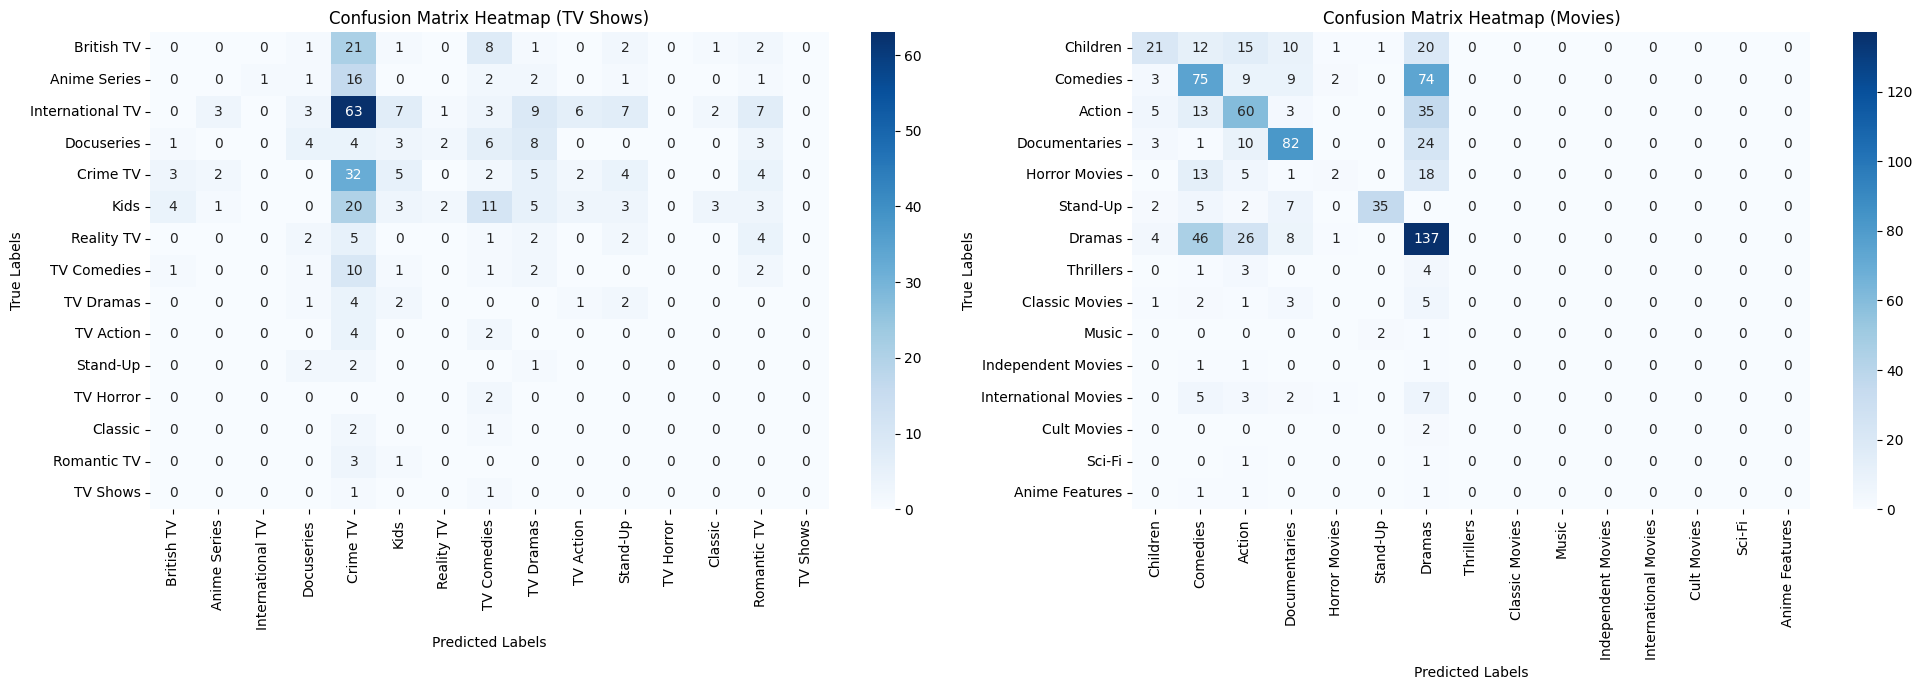

In [313]:
# Create a heatmap to visualize the confusion matrix
# Create a single figure with two subplots side by side
plt.figure(figsize=(20, 7))

# Plot the first heatmap for TV Shows
plt.subplot(1, 2, 1)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=tvshow_class_names, yticklabels=tvshow_class_names)
plt.title('Confusion Matrix Heatmap (TV Shows)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot the second heatmap for Movies
plt.subplot(1, 2, 2)
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=movie_class_names, yticklabels=movie_class_names)
plt.title('Confusion Matrix Heatmap (Movies)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## ***OBSERVATION:***
- ***During the ML model classification we observed the models like XGBoost and k-NN demonstrated a tendency to overfit the training data, effectively identifying patterns but struggling with generalization on the test set, particularly for underrepresented classes with fewer than 20 records. Strategies such as hyperparameter tuning (e.g., pruning), incorporating synthetic data to balance class distribution and using features like cast and actor could improve model performance and mitigate overfitting.  Alternatively, combining similar classes based on human knowledge and confusion matrix we can create hierarchical or multi-level models that might help improve performance by simplifying the classification task for smaller subsets of data.***

- ***During the DL model classification we observed from the loss and accuracy curves, the custom deep learning model showed slow convergence and inconsistent performance across validation and test sets, indicating challenges in optimization. In contrast, the transformer-based model exhibited rapid loss reduction and room for further improvement with extended training steps. However, transfer learning for TV shows did not yield better results than the base model, suggesting that training the model from scratch may be more effective in this scenario.***

## 4️⃣ Statistics for Model Selection

In this section you should compare the models that you trained in the previous section using statistical tests and justify your choice of model.
**Hint:** Use the McNemar Test


***In the previous section, we identified the best-performing models from both machine learning (ML) and deep learning (DL) approaches using classification reports. To further validate the comparative performance, we will conduct a McNemar test, which is a statistical test used to analyze paired nominal data. Similar to a chi-square test, the McNemar test evaluates the null hypothesis that the two models have the same error rate***

In [388]:
# workaround for not saving the y_tests
y_true = []
_, _, _, y_test = train_test_split(movies_movies_df['title_description'], movies_movies_df['genre_encoded'], test_size=0.2, random_state=42, stratify=movies_movies_df['genre_encoded'])
inverse_movies_genre_mapping = {v: k for k, v in movies_genre_mapping.items()}  # Reverse the mapping
movie_class_names= list(movies_genre_mapping.keys())
y_test = [inverse_movies_genre_mapping[label] for label in y_test]

y_true.extend(y_test)
_, _, _, y_test = train_test_split(tvshows_movies_df['title_description'], tvshows_movies_df['genre_encoded'], test_size=0.2, random_state=42, stratify=tvshows_movies_df['genre_encoded'])
inverse_tvshows_genre_mapping = {v: k for k, v in tvshows_genre_mapping.items()}  # Reverse the mapping
movie_class_names= list(tvshows_genre_mapping.keys())`
y_test = [inverse_tvshows_genre_mapping[label] for label in y_test]
y_true.extend(list(y_test))


In [389]:
#combining the labels

y_pred_tf= list(np.load('tf_movies_model.npy'))
y_pred_tf_tvshow = list(np.load('tf_tvshows_model.npy'))
y_pred_tf.extend(y_pred_tf_tvshow)

y_pred_knn = list(np.load('knn_movies_model.npy'))
y_pred_knn_tvshow = list(np.load('knn_tvshows_model.npy'))
y_pred_knn.extend(y_pred_knn_tvshow)

y_truth = y_true  # Ground truth labels
y_pred_model1 = y_pred_tf  # Predictions from Model 1
y_pred_model2 = y_pred_knn  # Predictions from Model 2

In [393]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np


# Encode string labels into integers
label_encoder = LabelEncoder()
all_labels = y_truth + y_pred_model1 + y_pred_model2  # Combine all labels to fit the encoder
label_encoder.fit(all_labels)

y_truth_encoded = label_encoder.transform(y_truth)
y_pred_model1_encoded = label_encoder.transform(y_pred_model1)
y_pred_model2_encoded = label_encoder.transform(y_pred_model2)

# Create binary arrays for agreement with ground truth
b1 = np.array(y_truth_encoded == y_pred_model1_encoded)
b2 = np.array(y_truth_encoded == y_pred_model2_encoded)

# Contingency table for McNemar test
contingency_table = confusion_matrix(b1, b2, labels=[0, 1])

# Perform McNemar test
result = mcnemar(contingency_table, exact=True)  # Use `exact=False` for large datasets

# Output results
print(f"Contingency Table:\n{contingency_table}")

print(f"P-value: {result.pvalue}")
if result.pvalue <= 0.05:
    print("Reject Null Hypotheis")
    print("Conclusion: Model have statistically different error rate")
else:
    print("Accept Null Hypotheis")
    print("Conclusion: Model do not have statistically different error rate")

Contingency Table:
[[420 365]
 [134 318]]
P-value: 9.371600628609746e-26
Reject Null Hypotheis
Conclusion: Model have statistically different error rate


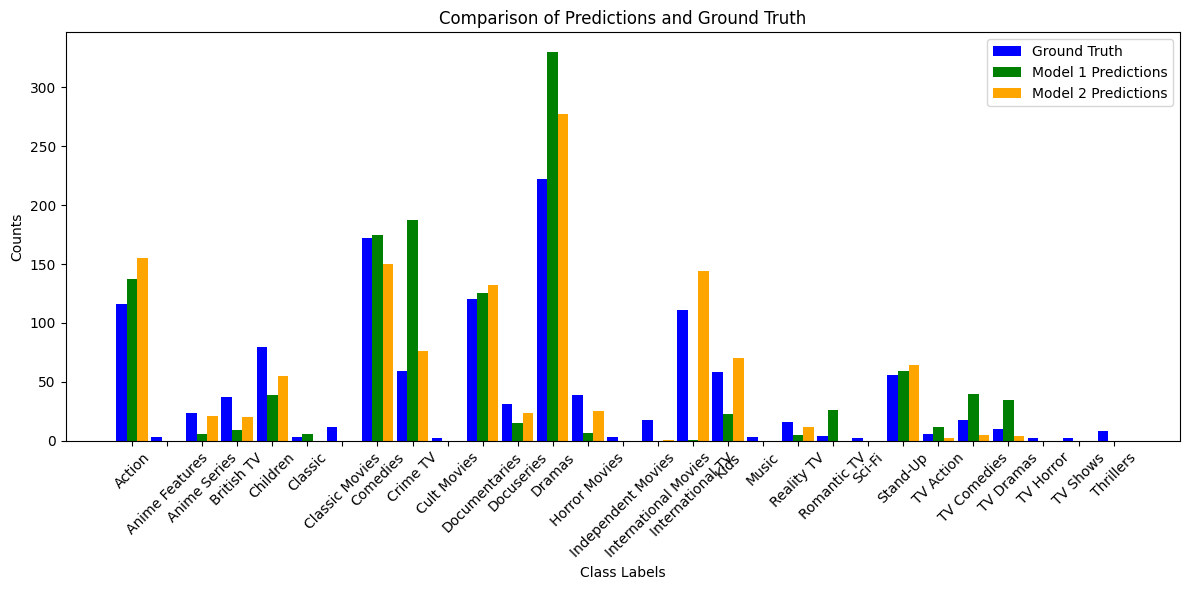

In [384]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Convert predictions and truth to numpy arrays for consistency
y_truth = np.array(y_truth)
y_pred_model1 = np.array(y_pred_model1)
y_pred_model2 = np.array(y_pred_model2)

# Count occurrences of each class in the ground truth and predictions
truth_counts = Counter(y_truth)
pred_model1_counts = Counter(y_pred_model1)
pred_model2_counts = Counter(y_pred_model2)

# Get unique classes (labels)
all_classes = sorted(set(y_truth) | set(y_pred_model1) | set(y_pred_model2))

# Prepare data for bar chart
truth_values = [truth_counts.get(cls, 0) for cls in all_classes]
model1_values = [pred_model1_counts.get(cls, 0) for cls in all_classes]
model2_values = [pred_model2_counts.get(cls, 0) for cls in all_classes]

x = np.arange(len(all_classes))  # Class positions for the x-axis

# Bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.3

plt.bar(x - bar_width, truth_values, bar_width, label="Ground Truth", color="blue")
plt.bar(x, model1_values, bar_width, label="Model 1 Predictions", color="green")
plt.bar(x + bar_width, model2_values, bar_width, label="Model 2 Predictions", color="orange")

# Formatting
plt.xlabel("Class Labels")
plt.ylabel("Counts")
plt.title("Comparison of Predictions and Ground Truth")
plt.xticks(x, all_classes, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


## ***OBSERVATIONS:***

***Based on the classification report, it is evident that ML model performs better than DL model.  McNemar test further confirms that the performance of both the models is different and that ML model's is high and DL model is low.***

## Some Helpful References:
1. [Scikit-learn documentation](https://scikit-learn.org/stable/)
2. [Hugging-Face documentation](https://huggingface.co/docs)
3. [Spacy documentation](https://spacy.io/)
Feel free to use any other libraries that you may prefer.